In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier ###DecisionTree
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
data = pd.read_csv("FinTech Data.csv")
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
data.fillna('unknown', inplace=True)
data['savings_balance'].unique()
data['employment_duration'].unique()

array(['> 7 years', '1 - 4 years', '4 - 7 years', 'unemployed',
       '< 1 year'], dtype=object)

In [5]:
data['savings_balance'].value_counts()
data['employment_duration'].value_counts()

,count
employment_duration,
1 - 4 years,339
> 7 years,253
4 - 7 years,174
< 1 year,172
unemployed,62


In [6]:
#one hot encoding using OneHotEncoder of Scikit-Learn

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")


Encoded Employee data : 
     months_loan_duration  amount  percent_of_income  years_at_residence  age  \
0                       6    1169                  4                   4   67   
1                      48    5951                  2                   2   22   
2                      12    2096                  2                   3   49   
3                      42    7882                  2                   4   45   
4                      24    4870                  3                   4   53   
..                    ...     ...                ...                 ...  ...   
995                    12    1736                  3                   4   31   
996                    30    3857                  4                   4   40   
997                    12     804                  4                   4   38   
998                    45    1845                  4                   4   23   
999                    45    4576                  3                   4   27   

  

In [7]:
X = df_encoded.iloc[:,2:16].values
X
y = df_encoded.iloc[:,16].values
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
!pip install six

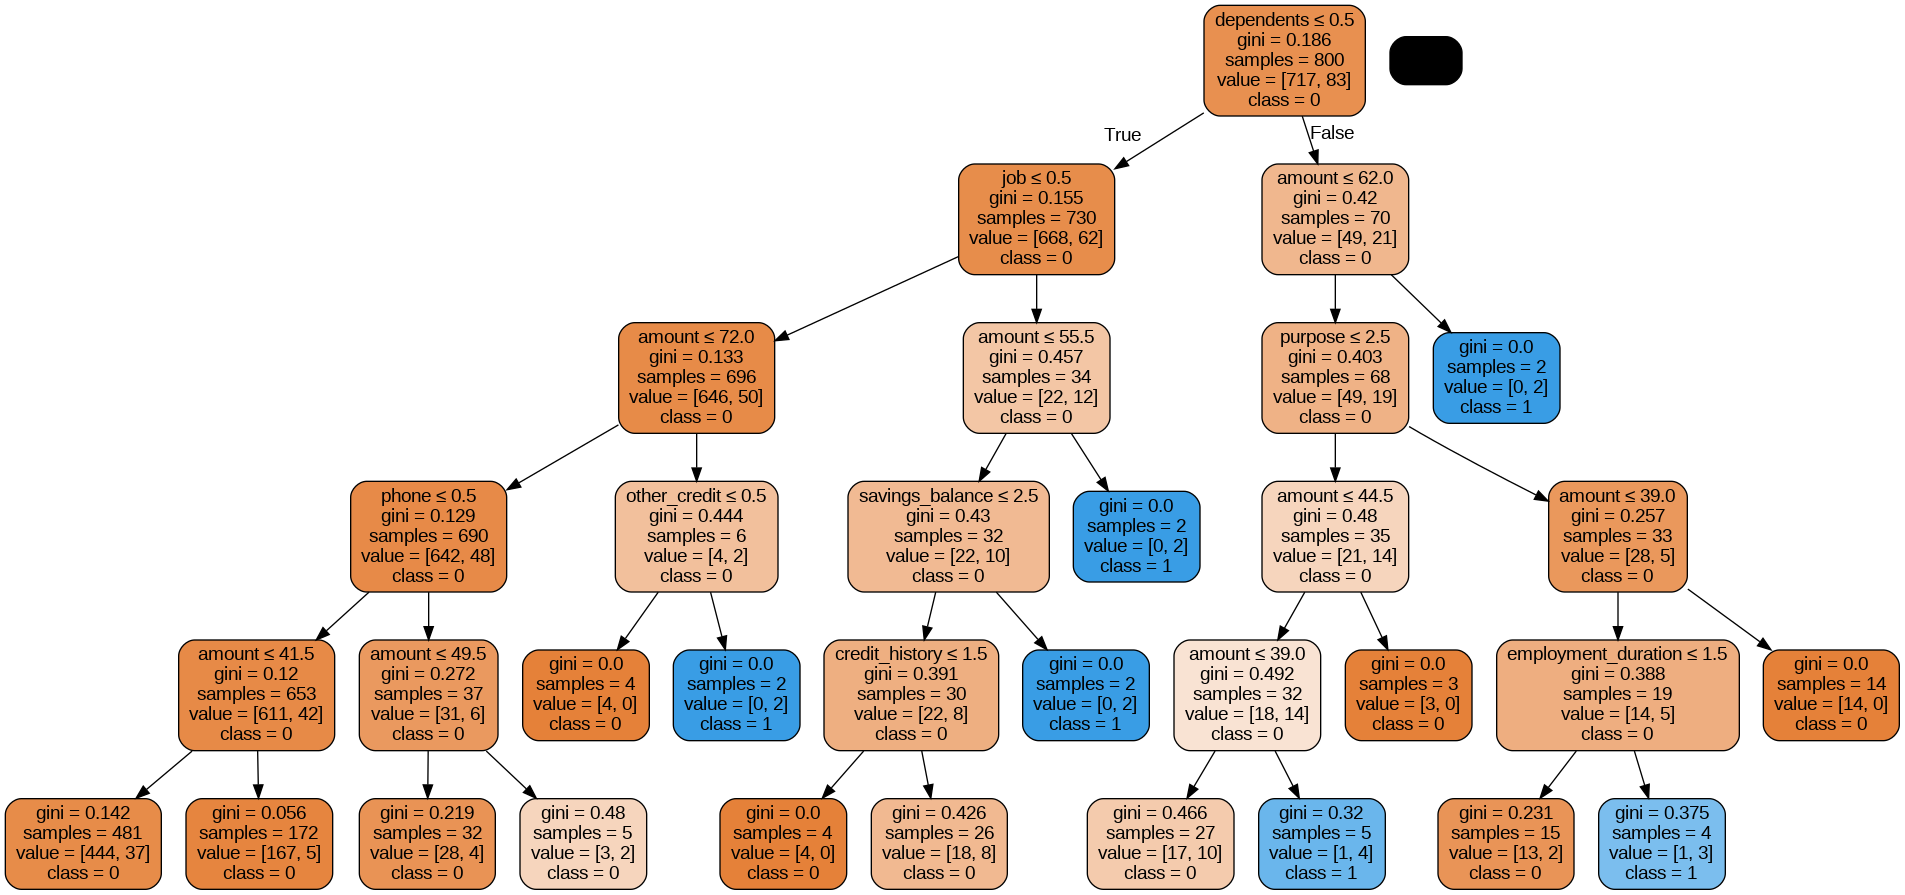

In [11]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
feature_cols = ["credit_history","purpose", "amount", "savings_balance","employment_duration", "percent_of_income", "years_at_residence", "age", "other_credit", "housing","existing_loans_count","job",
                "dependents","phone"]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FinTech.png')
Image(graph.create_png())

Accuracy: 0.92


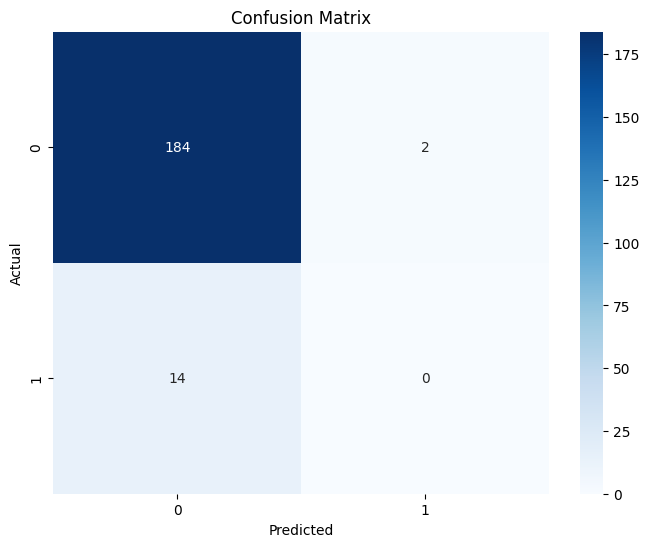

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your classifier and obtained y_pred
y_pred = clf.predict(X_test)
y_pred = (y_pred > 0.5)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Accuracy:",metrics.accuracy_score(y_test, y_pred_bagging))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.9


In [19]:
# Assuming you have already trained your DecisionTreeClassifier (clf) and BaggingClassifier (bagging_clf)

# Predictions from Decision Tree
y_pred = clf.predict(X_test)

# Predictions from Bagging Classifier
y_pred_bagging = bagging_clf.predict(X_test)

# Combine predictions (example: simple averaging)
y_pred_combined = (y_pred + y_pred_bagging) / 2

# Thresholding for classification (if needed)
y_pred_combined = (y_pred_combined > 0.5)

# Evaluate combined predictions
print("Combined Accuracy:", metrics.accuracy_score(y_test, y_pred_combined))


Combined Accuracy: 0.93


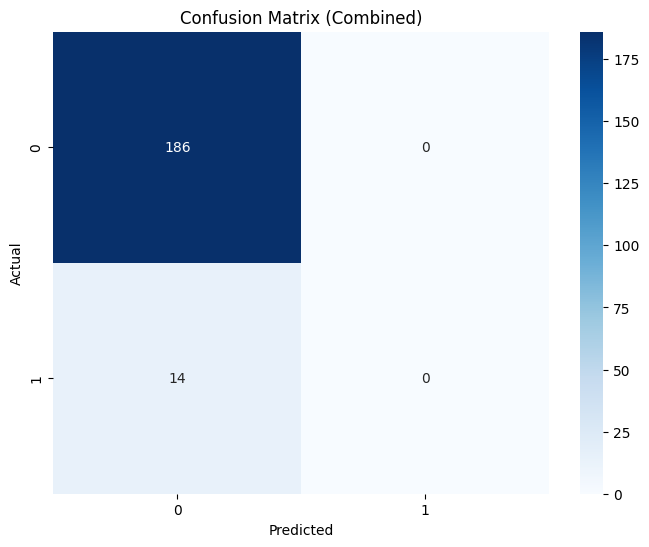

In [22]:


import matplotlib.pyplot as plt
# Create confusion matrix for combined predictions
cm_combined = confusion_matrix(y_test, y_pred_combined)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Combined)")
plt.show()

In [23]:
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Bagging Accuracy:",metrics.accuracy_score(y_test, y_pred_bagging))
print("Combined Accuracy:", metrics.accuracy_score(y_test, y_pred_combined))


Decision Tree Accuracy: 0.92
Bagging Accuracy: 0.9
Combined Accuracy: 0.93
